## Part a: Laser Doppler Anemometry (11 points)
### a)
The characteristic response time of a particle is $\tau=\frac{2}{9}a^{2}\frac{abs{\rho_p - \rho_f}}{\mu}$. We plot this as a function of the particle radius.

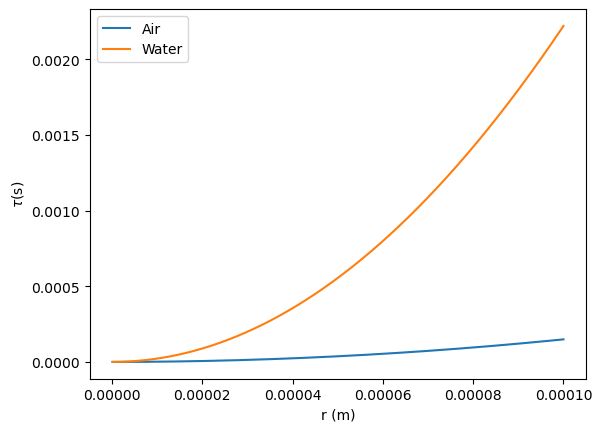

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

rho = 1.02 #g/cm^3
rho_tracers = (rho/1000)*(1e-6) #kg/m^3
rho_air = 1.225 #kg/m^3
rho_water = 1000 #kg/m^3
mu_air = 1.825e-5
mu_water = 1.0005e-3
rmin = 100e-9
rmax = 100e-6

r = np.linspace(rmin, rmax, 1000)
rho_f = rho_air
mu = mu_air
tau_air = ((2/9)*(r**2)*abs(rho_tracers-rho_f))/mu
beta = 3*rho_f/(rho_f+2*rho_tracers)
St_air = r**2/(3*beta*(mu**2))

rho_f = rho_water
mu = mu_water
tau_water = ((2/9)*(r**2)*abs(rho_tracers-rho_f))/mu
beta = 3*rho_f/(rho_f+2*rho_tracers)
St_water = r**2/(3*beta*(mu**2))

plt.figure()
plt.plot(r, tau_air, label='Air')
plt.plot(r, tau_water, label='Water')
plt.xlabel('r (m)')
plt.ylabel(r'$\tau$(s)')
plt.legend()
plt.show()


In [3]:
print('For air St=', np.min(St_air), np.max(St_air))
print('For water St=', np.min(St_water), np.max(St_water))

For air St= 3.3360438745324106e-06 3.3360438745324115
For air St= 1.110000832780389e-09 0.0011100008327803892


In [5]:
print((rho_tracers-rho_air)/rho_air)
print((rho_tracers-rho_water)/rho_water)

-0.9999999991673468
-0.99999999999898


### a2)
(answer here)

### a3)
DO WE NEED TO DO A PARTICLE RATE CORRECTION?

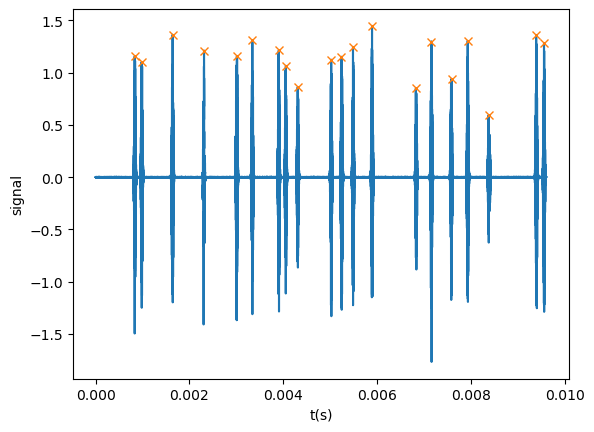

In [7]:
def bartlett_fft(signal, fs, n_pieces):
    # Cut the signal into n equally-sized pieces
    signal_list = np.split(signal, n_pieces)
    P_list = []

    # Calculate power spectrum of each piece
    for piece in signal_list:
        P_list.append(np.abs(np.fft.fft(piece))**2)

    # Calculate the average power spectrum
    P_av = np.mean(P_list, axis=0)

    # Calculate the frequency array
    f = np.fft.fftfreq(piece.size, 1/fs)
    idx = np.argsort(f)

    # Get only positive frequencies
    f, P_av = f[idx], P_av[idx]

    return f, P_av

# load data and plt
arr = np.loadtxt("LDA-signal.csv",
                 delimiter=",",skiprows=1)
t = arr[:,1]
signal = arr[:,2]

angle = 9*(2*np.pi/360) #angle to radians
lam = 488e-9
width = 600
whalf = 300
peaks, _ = find_peaks(signal, height=0.5, distance=600)

plt.figure()
plt.plot(t, signal)
plt.plot(t[peaks], signal[peaks], "x")
plt.xlabel('t(s)')
plt.ylabel('signal')
plt.show()

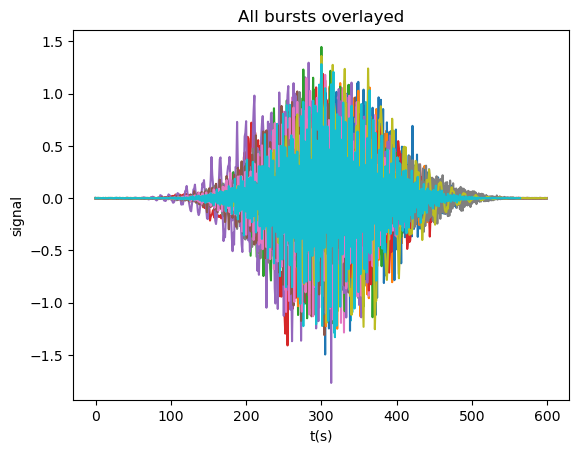

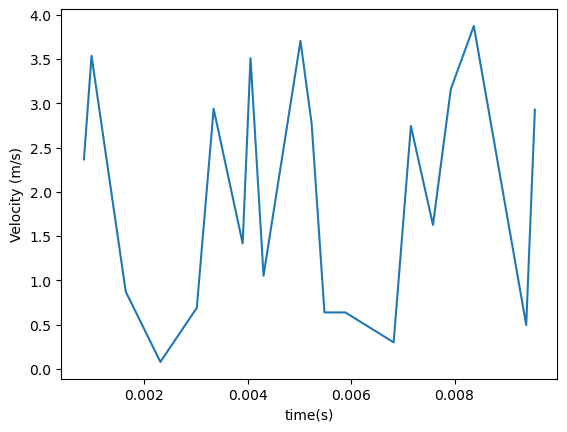

In [9]:
#take each burst and analyse the frequency spectrum
V = np.zeros(0)
T = np.zeros(0)
for i in peaks:
    #find burst signal
    burst = signal[i-whalf:i+whalf]
    
    plt.figure(4)
    plt.plot(burst)
    plt.title('All bursts overlayed')
    plt.xlabel('t(s)')
    plt.ylabel('signal')
    
    #frequency spectrum analysis
    fs = 1/(t[1]-t[0])     # Hz
    n_pieces = 1
    f, PS = bartlett_fft(burst, fs, n_pieces)
    
    #find most powerful frequency
    ind = np.argmax(PS) #find peak
    fD = abs(f[ind])
    
    
    vp = fD*lam/(2*np.sin(angle))
    v = vp/(1-np.exp(-t[i]/tau_air[0]))
    V = np.append(V, v)
    T = np.append(T, t[i])
plt.show()
plt.figure(3)
plt.plot(T, V)
plt.xlabel('time(s)')
plt.ylabel('Velocity (m/s)')
plt.show()

### a4)
The measurement volume is (according to the handbook):\
$V_0=\frac{4}{3}\pi a_o b_o c_o$, with $a_0 = \frac{d_{w1}/2}{\cos{\Theta/2}}$, $b_0=\frac{d_{w1}}{2}$, $c_0=\frac{d_{w1}/2}{\sin{\Theta/2}}$ and $d_{w1}=\frac{4f\lambda_b}{\pi d_{w0}}$

In [ ]:
#calculation here